# A Predictive model for phishing detection

**Under Guidance of**                    
Dr. Jaidhar C.D.   


**Group Members:**

Abhishek Kumar(202IT001)

Mohd Asif Khan Khaishagi(202IT013)






# Introduction </br>
Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.
</br></br>
Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.
</br></br>
Phishing is popular among attackers, since it is easier to trick someone into clicking a malicious link which seems legitimate than trying to break through a computer’s defense systems. 

So here we have tried to develop an **APS(Anti phishing system)** which takes and url as input and can tell whether that site is a phishing site or benign site.
</br></br>
We know that to train machine learning model, we need some features about these urls so that by learning about that features machine can tell that whether an url is phishing or benign. So we have considered three types of features.


1.   URL based features
2.   Web document property
3.   The behaviour of a web page



1. URL based features:-</br>
It is very important to take URL based features into consideration beacuse phishers may manipulate the legitimate urls and make fraudulant url's and make people feel that this url is legitimate.

e.g.
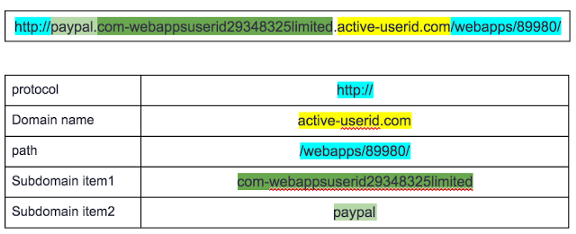

2. Web document based property:-
</br>The Web document properties of a webpage are extracted from
Document tag which includes the Title tag, Meta tag, Alt attribute
of tags, Title attribute of tags, meta description etc. where keywords associated with a web page’s product or services are
defined. Thus, a web documents property can be acquired from
its keyword’s identity.
</br>
Now by using these document based property phishers may rannk their website higher and manipulate users. so that if some user search about that product then their website appears first and user get scammed.



3. The bahaviour of web page </br>
The behaviour of a webpage describes the features of a webpage
which are related to how the webpage handles its underground
processes. Such underground processes may include how the
transmission is made between the HTTP cookies and web server,
the WHOIS history, port number type, certificate type e.g. selfissued or trusted third-party etc

**Note :-** Later we'll discuss what features are selected in these three types with proper reasoning after data visualisaton.

# Dataset </br>
Now coming to dataset ,
</br>  

* For phishing dataset we crawl the phishtank website and extrated  
around 48.5K phising urls and then among those urls we selected the urls which are valid phish and also online.
After applying these 2 filters i.e validity and online then we got 2420 urls out of 48.5k.


* For Legitimate(benign) urls we have downloaded 1 million legitimate urls.Now since we got 2420 phish urls after the 2 filters the for balancing the dataset for classification we'll also use around 2500 benign url in dataset




In [ ]:
#get 1 million most visted websites list
!wget http://s3-us-west-1.amazonaws.com/umbrella-static/top-1m.csv.zip

In [ ]:
!unzip top-1m.csv.zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
benign_urls = pd.read_csv("top-1m.csv",header=None)

In [ ]:
benign_urls.head()

,0,1
0,1,google.com
1,2,microsoft.com
2,3,www.google.com
3,4,data.microsoft.com
4,5,windowsupdate.com


In [ ]:
#INSTALL DEPENDENCIES
!pip install IPy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#IMPORT DEPENDENCIES
from IPy import IP
# from urllib.request import urlopen
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup

# URL based filter

* Checking Url with '@'symbol: -</br>
 This involves using @ symbol in the URL
path of a website. This symbol is used to redirect traffic to phishing
site whose domain name immediately followed the @ symbol. For
example, </br>HTTP// mapoly.edu.ng@gatewaypoly.edu.ng will direct a
user to Gatewaypoly instead of Mapoly. The @ symbol usually
comes with a shorter domain name unlike some other symbols
such as ‘‘-” or ‘‘.”.
Therefore, if URL contains @ symbol then phishing otherwise
legitimate




In [ ]:
def check_at_symbol(s):
  if "@" in s:
    return True
  else:
    return False

* Checking Ip in URL:- </br>This involves the use of IP
address to represent the domain name of a website. Usually, this
practice is very common for hiding the original information of a
domain name. Hence, such IP address usually denotes phishing
or suspicious domain.
If URL contains Domain path as IP address then Phishing, otherwise legitimate

In [ ]:

def check_if_ip(s):
  try:
    s = s.replace("http://","")
    s = s.replace("https://","")
    if s.find('/')!=-1 :
      index = s.find('/')
      s = s[:index]
    x = IP(s)
    return True
  except:
    return False

In [ ]:
check_if_ip("goo.gl")

False

* Checking hexadecimal characters in urls :- </br>
Phishers usually
hide phishing URLs by using hexadecimal codes to represent the
numbers in the IP address. Each hexadecimal code usually begins
with a ‘‘%” symbol. For instance,</br> http://donefe.000web-hostapp.com/auto/auto%20ferify/mail.php which was reported in
January 2018 by PhishTank used the hexadecimal character code.
If URL contains hexadecimal character then phishing, otherwise
legitimate

In [ ]:
def check_hexadecimal_code(s):
  if s.find("%")!=-1:
    return True
  else:
    return False

In [ ]:
check_hexadecimal_code("127.0.0.1/abcdef")

False

* Checking URL length :- </br>
 This involves getting a URL length that is more
than 35 characters. For example, [HTTP// womenincoachingsuccess.com](https://) found on the Alexa database is a legitimate URL. A close
observation of the Alexa database indicated that any length of
more than 35 is likely to be phishing.
If URL length greater than 35 then phishing Otherwise,
legitimate

In [ ]:
def check_allowed_url_length(s):
  if len(s)>35:
    return True
  else:
    return False

* Checking // in URL :- </br>
This involves the use of more than
one ‘‘//” in the domain name path of a URL. A search query on
the 1 million Alexa database of legitimate URLs in a.csv excel format returns 0 for this feature.
If URL contains multiple ‘‘//” then phishing Otherwise legitimate

In [ ]:
def check_double_slash_symbol(s):
  if s.count("//")>=2:
    return True
  else:
    return False

Parsing a website and storing the html text and cookie into a dictionary as value and url as a key and if we get response as none or haveing some runtime error that means that site is offline so in that case we strored none.

In [ ]:
h_text = {}
h_cookie = {}

In [ ]:
def parse_page_from_url(url):
  # page = urlopen(url)
  # html_bytes = page.read()
  # html = html_bytes.decode("utf-8")
  try:
    response = requests.get(url, verify=False)
    # print(response.text)
    html=response.text
    h_text[url] = html
    h_cookie[url] = response.cookie
  except:
    h_text[url] = None
    h_cookie[url] = None

Checking a website is already parsed or not if parsed the then return true and if not then first parse then return true.

In [ ]:
def check_map(url):
  if url in h_text:
    return True
  else:
    parse_page_from_url(url)
    return True

In [ ]:
def return_removed_url(s,j):
  return s.replace("."+j,"")

Removing the domain extensions from url and replace it with already existing extenstions present in the "domain_extension_list"

In [ ]:
def remove_domain_extensions_from_url(s):
  url_components = s.split(".")
  for i in range(0,len(url_components)):
    for j in range(0,len(domain_extension_list)):
      # print(i,j)
      if url_components[i]==domain_extension_list[j]:
        return return_removed_url(s,domain_extension_list[j])

In [ ]:
def check_domain_name(s):
  if s.count("https://")==0:
    s = "https://"+s
  if check_map(s):
    html = h_text[s]
    if html ==None:
      return False
    s_after = remove_domain_extensions_from_url(s)
    # print("s",s)
    if s_after == None:
      # print(s)
      return False
    sa = s_after.split(".")

    for i in range(0,len(sa)):
      if html.find(sa[i])!=-1:
        return True
    return False
  else:
    raise ValueError('Parse Page First')
    

In [ ]:
check_domain_name('http://windowsupdate.com/')

False

In [ ]:
#prefix suffix in path of url
#server form check

In [ ]:
def check_prefix(s):
  return check_domain_name(s)

In [ ]:
#here we checked if there is form in the given website
def check_form(url):
  try:
    if url.count('http://')<=0:
      url = "http://"+url
    check_map(url)
    html = h_text[url]
    soup = BeautifulSoup(html, 'html.parser')
    urls = []
    for link in soup.find_all('form'):
        # link.get('href')
        return True
    return False
  except:
    return False

In [ ]:
#here we checked if the url is one of famous url shortener service
famous_url_shorteners = ["goo.gl","bit.ly","owl.ly","deck.ly","bl.ink"]
#abnormal url shortening
def abnormal_url_shortening(url):
  for i in range(0,len(domain_extension_list)):
    # print(domain_extension_list[i])
    dom = str(domain_extension_list[i])
    
    if url.find(dom)!=-1:
      return False
  # print("completed level 1")
  for i in range(0,len(famous_url_shorteners)):
    if url.find(famous_url_shorteners[i])!=-1:
      return False
  return True

In [ ]:
abnormal_url_shortening("goo.gl")

False

In [ ]:
#here we checked all links and do they have downloadable links
def get_all_links_from_url(url):
  reqs = requests.get(url)
  soup = BeautifulSoup(reqs.text, 'html.parser')
  
  urls = []
  for link in soup.find_all('a'):
      print(link.get('href'))
      urls.append(link.get('href'))
      

In [ ]:
#here we checked all links and do they have downloadable links
known_extensions = ["mp4", "m4a", "m4v", "f4v", "f4a", "m4b", "m4r", "f4b", "mov" , "3gp", "3gp", "3g2", "3gpp","mp3","png","jpg","bmp"]
def check_malicious_software_download_extension(url):
  try:
    if url.count("http://")==0:
      url = "http://"+url
    check_map(url)
    html = h_text[url]
    soup = BeautifulSoup(html, 'html.parser')
      
    urls = []
    for link in soup.find_all('a'):
      # print(link.get('href'))
      urls.append(link.get('href'))
      v = link.get('href')
      extension = v.split('.')[-1]
      if len(extension)==3:
        pass
        if extension in known_extensions:
          return False
        else:
          return True
      else:
        return False
  except:
    return False

In [ ]:
check_malicious_software_download_extension("www.google.com")

False

#### PARCING DOMAIN EXTENSION NAME CSV

##ONETIME

In [ ]:
domain_ext = pd.read_csv("name.csv",header=None)

In [ ]:
domain_ext.head()

In [ ]:
domain_extension_list = []
l=0
for i in domain_ext.itertuples():
    k=0 
    if l > 0 :
      for j in i:
        if k%2==0 and k > 0:
          p = str(j).lower()
          domain_extension_list.append({"domain_extension" : p})
          print(p,end=' ')
        k = k+1
      print()
    l = l+1

df = pd.DataFrame(domain_extension_list)
df.to_csv('domain_extension_list.csv', index=False)

##EVERYTIME

In [ ]:
#READ FROM CSV TO PANDAS DF
domain_extension_list_df = pd.read_csv("domain_extension_list.csv")
domain_extension_list_df.head()

,domain_extension
0,abogado
1,ac
2,academy
3,accountant
4,accountants


In [ ]:
domain_extension_list = []
for i in domain_extension_list_df.itertuples():
  # print(i[1])
  domain_extension_list.append(i[1])

WHOIS is a query and response protocol that is widely used for querying databases that store the registered users or assignees of an Internet resource, such as a domain name, an IP address block or an autonomous system, but is also used for a wider range of other information. The protocol stores and delivers database content in a human-readable format.
</br>
There is pyhton library for querying.

###WHOIS CHECK

In [ ]:
!pip install whois

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!apt-get install whois

Reading package lists... Done
Building dependency tree       
Reading state information... Done
whois is already the newest version (5.3.0).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
W: Not using locking for read only lock file /var/lib/dpkg/lock-frontend
W: Not using locking for read only lock file /var/lib/dpkg/lock
W: Not using locking for read only lock file /var/cache/apt/archives/lock


In [ ]:
!apt -y install netbase

Reading package lists... Done
Building dependency tree       
Reading state information... Done
netbase is already the newest version (5.4).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
W: Not using locking for read only lock file /var/lib/dpkg/lock-frontend
W: Not using locking for read only lock file /var/lib/dpkg/lock
W: Not using locking for read only lock file /var/cache/apt/archives/lock


In [ ]:
!whois google.com

   Domain Name: GOOGLE.COM
   Registry Domain ID: 2138514_DOMAIN_COM-VRSN
   Registrar WHOIS Server: whois.markmonitor.com
   Registrar URL: http://www.markmonitor.com
   Updated Date: 2019-09-09T15:39:04Z
   Creation Date: 1997-09-15T04:00:00Z
   Registry Expiry Date: 2028-09-14T04:00:00Z
   Registrar: MarkMonitor Inc.
   Registrar IANA ID: 292
   Registrar Abuse Contact Email: abusecomplaints@markmonitor.com
   Registrar Abuse Contact Phone: +1.2083895740
   Domain Status: clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited
   Domain Status: clientTransferProhibited https://icann.org/epp#clientTransferProhibited
   Domain Status: clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited
   Domain Status: serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited
   Domain Status: serverTransferProhibited https://icann.org/epp#serverTransferProhibited
   Domain Status: serverUpdateProhibited https://icann.org/epp#serverUpdateProhibited
   Name Server

In [ ]:
import whois
domain = whois.query('google.com')

In [ ]:
print(domain.__dict__)

{'name': 'google.com', 'registrar': 'MarkMonitor Inc.', 'registrant_country': 'US', 'creation_date': datetime.datetime(1997, 9, 15, 4, 0), 'expiration_date': datetime.datetime(2028, 9, 14, 4, 0), 'last_updated': datetime.datetime(2019, 9, 9, 15, 39, 4), 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'statuses': ['serverTransferProhibited (https://www.icann.org/epp#serverTransferProhibited)', 'clientTransferProhibited (https://www.icann.org/epp#clientTransferProhibited)', 'serverUpdateProhibited (https://www.icann.org/epp#serverUpdateProhibited)', 'serverUpdateProhibited https://icann.org/epp#serverUpdateProhibited', 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'serverDeleteProhibited (https://www.icann.org/epp#serverDeleteProhibited)', 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'serverDeleteProhibited https://icann.org/epp#se

In [ ]:
import datetime
import math

In [ ]:
ext=['com', 'uk', 'ac_uk', 'ar', 'at', 'pl', 'be', 'biz', 'br', 'ca', 'cc', 'cl', 'club', 'cn', 'co', 'jp', 'co_jp', 'cz', 'de', 'store', 'download', 'edu', 'education', 'eu', 'fi', 'fr', 'id', 'in_', 'info', 'io', 'ir', 'is_is', 'it', 'kr', 'kz', 'lt', 'ru', 'lv', 'me', 'mobi', 'mx', 'name', 'net', 'ninja', 'se', 'nu', 'nyc', 'nz', 'online', 'org', 'pharmacy', 'press', 'pw', 'rest', 'ru_rf', 'security', 'sh', 'site', 'space', 'tech', 'tel', 'theatre', 'tickets', 'tv', 'us', 'uz', 'video', 'website', 'wiki', 'xyz']

* Checking the age of the website :- </br>
This feature checks the age of the domain
name of a particular URL or the URL extracted from the
action attribute of a form using the WHOIS API search. Many
phishing pages claim the identity of a known brand which
has a relatively long history. If the age of the domain does
not correspond to its WHOIS lookups, then it is likely to be
deceptive

In [ ]:
def getAge(url):
  url= url.replace("http://","")
  url= url.replace("https://","")
  for i in ext:
    #print(i)
    if url.find(i)!=-1:
      url=url.split('.'+i,1)
      url=url[0]
      url=url+'.'+i
      # print(url)
      break
  domain=check_whois_map(url)
  print(domain)
  if domain!=None:
    creationdate=domain.creation_date
    today_Date=datetime.datetime.today()
    day=today_Date.day-creationdate.day
    month=today_Date.month-creationdate.month
    year=today_Date.year-creationdate.year
    age=(year*365)+(month*30)+day
    age=age/365
    return math.floor(age)
  else:
    return 0

In [ ]:
getAge("google.com")

23

This is nothing but for saving time i.e. store the result of query when we query first time and use the result.

In [ ]:
h_whois = {}
def check_whois_map(url):
  
  if url in h_whois:
    return h_whois[url]
  else:
    try:
      # do stuff
      domain=whois.query(url)
#       print('try check whois map',domain)
      h_whois[url] = domain
    except:
#       print('except check whois map',domain)
      domain = None
      h_whois[url] = domain
    return domain

If age is less than 1 then that website might be phishing

In [ ]:
def check_age(url):
  try:
    if url.count('http://')==1:
      url = "http://"+url
    age = getAge(url)
    print(age)
    if age < 1:
      # print(url,age)
      return True
    else:
      # print(url,age)
      return False
    
  except:
    return True

In [ ]:
check_age('http://google.com')

try check whois map <whois._3_adjust.Domain object at 0x14d98429bf40>
23


False

* Port Number behaviour:</br> This feature compares the port
number part of a domain name with the stated protocol part
of a URL. If the protocol does not match the port number,
then the page is a phishing site.

In [ ]:
def match_port(url):
  for word in url.split(':'):
   if word.isdigit():
      if word!=80:
        return True
  return False

In [ ]:
match_port("http://www.example.com:8080")

True

* Checking about the blacklisting domain : -</br>
If we do whois query then and if it doesn't return valid result then we can say the website may be blacklisted i.e. phising.

In [ ]:
def is_blacklisted(url):
  url= url.replace("http://","")
  url= url.replace("https://","")
  for i in ext:
    #print(i)
    if url.find(i)!=-1:
      url=url.split('.'+i,1)
      url=url[0]
      url=url+'.'+i
      # print(url)
      break
  domain=check_whois_map(url)
  if domain!=None:
    return False
  else:
    return True

In [ ]:
is_blacklisted("https://www.example.com/bdc")

True

In [ ]:
# import requests
  
# # Making a get request
# response = requests.get('https://odbierz-paczke.bid/poczta/pay.php', verify =True)
  
# # print request object
# print(response)

In [ ]:
# def validate_SSL(url):
#   chk=url[0:8]
#   #print(chk)
#   if chk=='https://':
#     return False
#   else:
#     return True

In [ ]:
# validate_SSL('https://www.facebook.com/')

False

In [ ]:
!pip install pyOpenSSL

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#SELF SIGNED SSL CERTIFICATE
from OpenSSL import SSL
from cryptography import x509
from cryptography.x509.oid import NameOID
import idna

from socket import socket
from collections import namedtuple

Code for getting the SSL cerificate for a given hostname and port

In [ ]:
# Reference : https://gist.github.com/gdamjan/55a8b9eec6cf7b771f92021d93b87b2c
HostInfo = namedtuple(field_names='cert hostname peername', typename='HostInfo')

def get_certificate(hostname, port):
    hostname_idna = idna.encode(hostname)
    sock = socket()

    sock.connect((hostname, port))
    peername = sock.getpeername()
    ctx = SSL.Context(SSL.SSLv23_METHOD) # most compatible
    ctx.check_hostname = False
    ctx.verify_mode = SSL.VERIFY_NONE

    sock_ssl = SSL.Connection(ctx, sock)
    sock_ssl.set_connect_state()
    sock_ssl.set_tlsext_host_name(hostname_idna)
    sock_ssl.do_handshake()
    cert = sock_ssl.get_peer_certificate()
    crypto_cert = cert.to_cryptography()
    sock_ssl.close()
    sock.close()

    return HostInfo(cert=crypto_cert, peername=peername, hostname=hostname)

In [ ]:
cert = get_certificate("self-signed.badssl.com",443)
cert

HostInfo(cert=<Certificate(subject=<Name(C=US,ST=California,L=San Francisco,O=BadSSL,CN=*.badssl.com)>, ...)>, hostname='self-signed.badssl.com', peername=('104.154.89.105', 443))

In [ ]:
cert.cert.subject

<Name(C=US,ST=California,L=San Francisco,O=BadSSL,CN=*.badssl.com)>

In [ ]:
cert.cert.issuer

<Name(C=US,ST=California,L=San Francisco,O=BadSSL,CN=*.badssl.com)>

In [ ]:
if cert.cert.issuer == cert.cert.subject:
  print(True)
else:
  print(False)

True


* SSL Certificate:</br> The Secure Socket Layer certificate is often
used every time-sensitive information is being transferred
by a user to an honest website. This certificate can either
be self-signed by a website or offered by a trusted third
party such as GeoTrust, VeriSign etc. There is a high level
of probity with a trusted third-party certificate than a self-signed certificate. So, checking that the SSL certificate is
offered by the trusted issuer is a feature of the legitimate
website. Otherwise, it is suspicious or phishy.

In [ ]:
h_ssl_map = {}
def check_if_self_signed_ssl(url):
  if url in h_ssl_map:
    return h_ssl_map[url]
  try:
    # print(url)
    url = url.replace("http://","").replace("https://","").replace("/","")
    cert = get_certificate(url,443)
    if cert.cert.issuer == cert.cert.subject:
      h_ssl_map[url] = True
      return True
    else:
      h_ssl_map[url] = False
      return False
  except:
    h_ssl_map[url] = False
    return False

In [ ]:
check_if_self_signed_ssl("microsoft.com")

False

In [ ]:
r = requests.get("http://www.facebook.com")

In [ ]:
r.cookies

<RequestsCookieJar[Cookie(version=0, name='fr', value='1BrlSpSV4ZKS8P2Do..Bgc9_S.Mz.AAA.0.0.Bgc9_S.AWXwIeTzi_0', port=None, port_specified=False, domain='.facebook.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1625982673, discard=False, comment=None, comment_url=None, rest={'httponly': None}, rfc2109=False), Cookie(version=0, name='sb', value='0t9zYFSQyaQiS1QU4uWFGpd5', port=None, port_specified=False, domain='.facebook.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1681278674, discard=False, comment=None, comment_url=None, rest={'httponly': None}, rfc2109=False)]>

* Checking abnormal cookie domain :-</br>
This feature checks how the
transmission of text data is done by a web server to a web
client. Information about client machine/users is usually
maintained in this text data, which is sometimes called HTTP
cookies. If a website has a domain cookie (DC ) which is in a
foreign domain, then it may be deceptive as most benign
websites have their domain cookies or no cookies.

In [ ]:
def check_abnormal_cookie_domain(url):
  try:
    if url.count('http://')<=0:
      url = "http://" + url
    check_map(url)
    p = h_cookie[url]
    # print(p)
    p = str(p)
    # print(p)
    s2 = p.find('for .')
    # print(s2)
    s3 = p.find('/', s2)
    # print(s3)
    p2 = p[s2+5:s3]
    # print(p2)
    if p2 in url:
      return False
    else:
      return True
  except:
    return False

In [ ]:
check_abnormal_cookie_domain("www.google.com")

False

In [ ]:
df_benign = benign_urls.head(2500)

In [ ]:
print(df_benign)

         0                               1
0        1                      google.com
1        2                   microsoft.com
2        3                  www.google.com
3        4              data.microsoft.com
4        5               windowsupdate.com
...    ...                             ...
2495  2496         col.eum-appdynamics.com
2496  2497       z-m-scontent.xx.fbcdn.net
2497  2498                     example.com
2498  2499  scontent.fsgn2-1.fna.fbcdn.net
2499  2500   dcintl1.push.heytapmobile.com

[2500 rows x 2 columns]


In [ ]:
url_list = []
for index, row in df_benign.iterrows():
  # print(index,row[1])
  url_list.append(row[1])

In [ ]:
def normalise(value):
  if value == True:
    return 1
  else:
    return 0

In [ ]:
from tqdm.notebook import tqdm
tqdm().pandas()

Applying all the functions on benign dataset and generating corresponding features

In [ ]:
h_result = []
i = 0
for url in tqdm(url_list):
  x = url
  f1 = normalise(check_at_symbol(x))
  f2 = normalise(check_if_ip(x))
  f3 = normalise(check_hexadecimal_code(x))
  f4 = normalise(check_allowed_url_length(x))
  f5 = normalise(check_double_slash_symbol(x))
  f6 = normalise(check_domain_name(x))
  f7 = normalise(check_prefix(x))
  f8 = normalise(check_form(x))
  f9 = normalise(abnormal_url_shortening(x))
  f10 = normalise(check_malicious_software_download_extension(x))
  f11 = normalise(check_abnormal_cookie_domain(x))
  f12 = normalise(check_age(x))
  f13 = normalise(match_port(x))
  f14 = normalise(check_if_self_signed_ssl(x))
  f15 = normalise(is_blacklisted(x))
  d = {"index": i,"url":url,'@_symbol':f1,"ip_as_url":f2,"hexadecimal_character":f3,"url_length":f4, "multiple_//":f5, "domain_name_check" : f6,"domain_name_in_path" : f7,"server_form_check":f8,'abnormal_url_shortening' : f9 ,"downloadable_malicious_code": f10,"abnormal_cookie_domain" : f11 , "age_of_domain" : f12, "ssl_certificate" : f13 ,"port_behaviour" : f14, "blacklist_domain" : f15, "is_phish" : 0 }
  h_result.append(d)
  i = i+1

data = pd.DataFrame(h_result)
data.to_csv("benignwebsites.csv")

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReq

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'youtube.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.youtube.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'officeapps.live.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Ins

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bing.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequ

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleadservices.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'googlevideo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'teams.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'teams.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lh3.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReque

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'browser.pipe.aria.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ocsp.digicert.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'edge-mqtt.facebook.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/c

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googletagservices.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ecs.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'v20.events.data.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'crashlytics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'firebase.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'firebase.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tiktok.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aka.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'products.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adsrvr.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adsrvr.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adsrvr.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWar

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'star.c10r.facebook.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.facebook.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdnjs.cloudflare.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpoo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 's0.2mdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'com.edgekey.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'inappcheck.itunes.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'graph.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connec

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.adobe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'business.adobe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'connectivitycheck.platform.hicloud.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/co

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bidswitch.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bidswitch.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'firebase-settings.crashlytics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/conn

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'endpoint.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nrdp52-appboot.netflix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'in.appcenter.ms'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'officeclient.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ups.analytics.yahoo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ups.analytics.yahoo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.oracle.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c.bing.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dns.google'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReques

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pixel.advertising.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pixel.advertising.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bootstrapcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpoo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'criteo.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.criteo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'support.content.office.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'suggestqueries.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.content.prod.cms.msn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ow1.res.office365.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectio

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'atm-fp-direct.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'atm-fp-direct.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pinterest.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pinterest.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pinterest.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insec

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'webcast16-normal-c-alisg.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mozilla.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mozilla.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectio

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'token.rubiconproject.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-cmaf-f16-sg01.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jquery.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/conne

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'exelator.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.pubmatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.zaloapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insec

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'whatsapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.whatsapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'whatsapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'waconafd.officeapps.live.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'youtube-ui.l.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-q5-sg01.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'time.android.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/co

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dropbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dropbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.dropbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecur

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sync-tm.everesttech.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eb2.3lift.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ocsp.godaddy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.godaddy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Inse

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hotjar.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hotjar.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hotjar.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRe

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ssum-sec.casalemedia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zadn.vn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-l1.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-f1-ab.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-rtmp-f1-ab.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ocsp-lb.apple.com.akadns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-pac

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-l11.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-f1.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.doubleverify.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-flv-f11-va01.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-rtmp-f11.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-flv-f1-sg01.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pull-hls-f11.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'wx.qlogo.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'slack.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'onesignal.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'onesignal.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mobilenetworkscoring-pa.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ad.turn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ad.turn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'platform.amobee.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecur

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'um.simpli.fi'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.coloros.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'footprints-pa.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.p

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kv601.prod.do.dsp.mp.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'weather.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'weather.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apps.mzstatic.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'instantmessaging-pa.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i1.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com.edgekey.net.globalredir.akadns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '360.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.360.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'id5-sync.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'id5-sync.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gumgum.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReques

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imapi-16.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mrodevicemgr.officeapps.live.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/conne

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'caldav.fe.apple-dns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c-api-bit.shopeemobile.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c-api-bit.shopeemobile.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urll

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cookielaw.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cookielaw.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cookielaw.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insec

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adblockplus.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adblockplus.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'verisign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecu

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lcdn-locator.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'p.typekit.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'typekit.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yahoo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yahoo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.segment.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ps.eyeota.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ps.eyeota.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'us-api.asm.skype.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'displaycatalog.mp.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive-thirdparty.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'xp.itunes-apple.com.akadns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/pyth

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apps.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hellogenie.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'wp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'wordpress.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequest

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cm.everesttech.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cm.everesttech.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i9.ytimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: 

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'me900.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.me900.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'me900.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWa

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.33across.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.33across.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure-assets.rubiconproject.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'corp.fluct.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rt.applovin.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dl-debug.dropbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: 

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'naver.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.taboola.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rtb0.doubleverify.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ocsp.sca1b.amazontrust.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connec

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ssl-google-analytics.l.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'graphql.instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'graphql.instagram.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urll

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sentry.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sentry.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alexametrics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReques

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'auction.unityads.unity3d.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'supersonicads.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.chartbeat.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yieldmo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yieldmo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yieldmo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureReq

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aad.cs.dds.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.taboola.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'client.teamviewer.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionp

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gstaticadssl.l.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'widgets.outbrain.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gfe.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.kaspersky.co.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'edge.activity.windows.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'uci.cdn.office.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectio

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'b-www.facebook.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'useinsider.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'useinsider.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ip-info.ff.avast.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'p16-sg.tiktokcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'unitedstates.smartscreen.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/u

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sync.ipredictive.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'meraki.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'meraki.cisco.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gsas.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gspe19-ssl.ls.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'setup.fe.apple-dns.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 's.ad.smaato.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'webcast19-normal-c-alisg.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'resolver.msg.xiaomi.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urlli

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alt4-mtalk.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alt2-mtalk.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alt5-mtalk.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '2.tlu.dl.delivery.mp.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'device-metrics-us.amazon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zendesk.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'stocks-sparkline.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'stocks-sparkline-origin.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.fbsbx.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mi.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mi.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dls.di.atlas.samsung.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Inse

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'outlook.ms-acdc.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'outlook.ms-acdc.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.microsoftonline.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/ur

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 's.thebrighttag.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRe

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zingmp3.vn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news-edge.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news-edge.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: 

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'webcast21-normal-c-alisg.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'webcast21-normal-c-alisg.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ssum.casalemedia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/s

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '11.tlu.dl.delivery.mp.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mediatek.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.mediatek.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connecti

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.odc.officeapps.live.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.p

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.paypal.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aax-us-east.amazon-adsystem.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'amazonvideo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionp

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'windscribe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'caldav.icloud.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'caldav.icloud.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: 

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gu.dyntrk.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'abs.twimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'onaudience.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.globalsign.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c-ring.msedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dmp.brand-display.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 't-ring.msedge.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.p

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'stripe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'stripe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'stripe.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWar

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Ins

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ping.citrix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Ins

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.entrust.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.entrust.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'p.jwpcdn.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecu

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'autopush.prod.mozaws.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'getui.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.getui.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'skimresources.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ocsp.entrust.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'apple.com.edgesuite.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.syndication.twimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'loopme.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ent-shasta-rrs.symantec.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connection

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'coccoc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'coccoc.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'decide.mixpanel.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureR

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.onesignal.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ib.3lift.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'partiality.itunes.apple.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'support.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'support.office.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'support.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.microsoftstore.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.kantar.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.kantar.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'control.kochava.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: I

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'beacon-api.aliyuncs.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'survata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.survata.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981:

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'google.com.ph'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.google.com.ph'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'steampowered.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: In

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'virtualearth.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bing.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bing.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.lazada.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.lazada.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.lazada.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecu

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'people.skype.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eu-v20.events.data.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'upload.wikimedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/con

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sticker-wpa.chat.zalo.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sticker-wpa.chat.zalo.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'events.appsflyer.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/con

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure-us.imrworldwide.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure-us.imrworldwide.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.outbrainimg.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urlli

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jaccount.sjtu.edu.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sjtu.edu.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mail.sjtu.edu.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: I

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.walkme.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cdn.walkme.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lcprd1.samsungcloudsolution.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'frontier-va.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'onedriveclucprodbn20025.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'static.asm.skype.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scontent.fhan2-6.fna.fbcdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hbx.media.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hbx.media.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api22-normal-c-alisg.tiktokv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'westus-prod-2.notifications.teams.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admanmedia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bolt-gcdn.sc-cdn.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'r.manage.microsoft.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.

In [ ]:
### FAKE URLS

In [ ]:
phish_urls = pd.read_csv("dataset.csv")

In [ ]:
print(phish_urls)

         value                                            value 2  value 5  \
0      6957932  https://integrated-health.com/dhl/Documents/tr...  Unknown   
1      6957931  https://interferenceeducation.com/896sa6d9986s...  Unknown   
2      6957930  https://www.pinturaslarrea.com/templates/mails...  Unknown   
3      6957929  https://rewardsick.com/986sad86a6sd6as6d986sad...  Unknown   
4      6957928  https://adultconcentration.com/a986sd869sa986d...  Unknown   
...        ...                                                ...      ...   
46116  6957972                 https://myfileformelie.weebly.com/  Unknown   
46117  6957971                           https://inpostmobile.net  Offline   
46118  6957970              https://www.n26-service.fr/n26/n26_de  Unknown   
46119  6957968  https://pepsico-mexico.com/remate-vehicular/vo...  Unknown   
46120  6957967  https://pepsico-mexico.com/remate-vehicular/to...  Unknown   

           value 6  
0          Offline  
1          Offline  


In [ ]:
phish_urls.head(100)

,value,value 2,value 5,value 6
0,6957932,https://integrated-health.com/dhl/Documents/tr...,Unknown,Offline
1,6957931,https://interferenceeducation.com/896sa6d9986s...,Unknown,Offline
2,6957930,https://www.pinturaslarrea.com/templates/mails...,Unknown,Offline
3,6957929,https://rewardsick.com/986sad86a6sd6as6d986sad...,Unknown,Offline
4,6957928,https://adultconcentration.com/a986sd869sa986d...,Unknown,Offline
...,...,...,...,...
95,6957818,http://64-leboncoin.fr/,Unknown,Offline
96,6957815,http://app-n26.online,Unknown,Offline
97,6957814,http://app-n26.online/,Unknown,Offline
98,6957806,http://leboncoin-messagerie.com/,Unknown,Offline


In [ ]:
phish_urls[phish_urls["value 6"]=="VALID PHISH"].count()["value 2"]

13666

In [ ]:
valid_phish = phish_urls[phish_urls["value 6"]=="VALID PHISH" and phish_urls["value 5"]=="ONLINE"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
valid_phish = phish_urls.loc[((phish_urls['value 6'] =="VALID PHISH") & (phish_urls["value 5"]=="ONLINE"))]

In [ ]:
print(valid_phish)

         value                                            value 2 value 5  \
11     6957921                   https://www.argenticias.com/com/  ONLINE   
12     6957920                    https://www.argenticias.com/com  ONLINE   
47     6957885  https://ekvarika.ru/build/Notificaciones_Popul...  ONLINE   
93     6957822  https://pbb-acesso.com/att20200129381027839871...  ONLINE   
101    6957803                  http://credicorpfiduciariasa.com/  ONLINE   
...        ...                                                ...     ...   
45917  6958407                        https://ycoe-a.ml/?login=do  ONLINE   
45919  6958402                 https://gilmerisd-gcb.tk/?login=do  ONLINE   
46038  6958097  https://www.evernote.com/shard/s661/client/snv...  ONLINE   
46054  6958052                              https://garant-olx.pl  ONLINE   
46106  6957982         http://todayif.com/amerujapan/oexpiredmeru  ONLINE   

           value 6  
11     VALID PHISH  
12     VALID PHISH  
47     VALID

In [ ]:
phish_url_list = valid_phish['value 2'].tolist()

In [ ]:
print(phish_url_list)

['https://www.argenticias.com/com/', 'https://www.argenticias.com/com', 'https://ekvarika.ru/build/Notificaciones_Popularenlinea_Consumo/Home.h...', 'https://pbb-acesso.com/att2020012938102783987128732href092839821739812...', 'http://credicorpfiduciariasa.com/', 'http://www.natwest.secured-online-verify.com/Login.php...', 'http://www.natwest.secured-online-verify.com/', 'https://eurohof.eu/index.php?sessionid&signin&country.x=DE&cache=d4piY...', 'https://eurohof.eu/', 'https://www.webfamily.com.br/simplific.com.br/.well-known/acme-challen...', 'https://www.attemplate.com/eur/login?id=Z2lySWsybTJtU25mZlhSVjRwODA0ZG...', 'http://paypal-uk-webcmd-login.done-login-access-krf41asdsge4h6g354sa3s...', 'https://lbc-colis-suivi.com/', 'https://shop.mts.ru/', 'https://ashubajaj.com/rub/?ruhr-uni-bochum.de/roundcubemail/...', 'http://xn--lcalbtcoins-scb7e.net/', 'https://cincinnatl-test.ebpages.com/5741825328414720#jeffreys.ryan@leg...', 'https://wild-reels.com/wp-content/plugins/fusion-core/incl

Applying all the functions on phising urls and generating corresponding features

In [ ]:
h_result_phish = []
i = 0
for url in tqdm(phish_url_list):
  x = url
  f1 = normalise(check_at_symbol(x))
  f2 = normalise(check_if_ip(x))
  f3 = normalise(check_hexadecimal_code(x))
  f4 = normalise(check_allowed_url_length(x))
  f5 = normalise(check_double_slash_symbol(x))
  f6 = normalise(check_domain_name(x))
  f7 = normalise(check_prefix(x))
  f8 = normalise(check_form(x))
  f9 = normalise(abnormal_url_shortening(x))
  f10 = normalise(check_malicious_software_download_extension(x))
  f11 = normalise(check_abnormal_cookie_domain(x))
  f12 = normalise(check_age(x))
  f13 = normalise(match_port(x))
  f14 = normalise(check_if_self_signed_ssl(x))
  f15 = normalise(is_blacklisted(x))
  d = {"index": i,"url":url,'@_symbol':f1,"ip_as_url":f2,"hexadecimal_character":f3,"url_length":f4, "multiple_//":f5, "domain_name_check" : f6,"domain_name_in_path" : f7,"server_form_check":f8,'abnormal_url_shortening' : f9 ,"downloadable_malicious_code": f10,"abnormal_cookie_domain" : f11 , "age_of_domain" : f12, "ssl_certificate" : f13 ,"port_behaviour" : f14, "blacklist_domain" : f15, "is_phish" : 1 }
  h_result.append(d)
  i = i+1

data = pd.DataFrame(h_result)
data.to_csv("phishwebsites.csv")

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ekvarika.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pbb-acesso.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.webfamily.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Ins

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'myburbankvacations.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'myburbankvacations.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'myburbankvacations.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/conne

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'example6383678.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fure.magekessy.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.doctricant.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/con

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lloydsbank.secure-online-deregister.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ibank.my-benchmark.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'grupvipsx.duckdns.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packag

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sertv354678908765.nicepage.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.overseasmexico.com.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.overseasmexico.com.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.lloydbanking-accountsecurity.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.lloydbanking-accountsecurity.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.overseasmexico.com.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'delpaz.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'delpaz.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bmatic.com.pe'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequest

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.verify-mynew-devices.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hiiishop.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hiiishop.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionp

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aplus.csjdq.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'atttohfhtt.weebly.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.www-bancaporitranet-interbanc21.pe'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urlli

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fixeduvocal.wixsite.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'olx.pl-save.cyou'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'accesopersonasweb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionp

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'att-sbc-n0w-pac-bell-south.godaddysites.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'snaptubeappandroid.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'facenook-follow.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/c

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.supports-services-account.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fabric.pk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.fabric.pk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpo

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'c-dkassinaletriclientesgv.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bcstchanga.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bastchangc.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.p

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure273.inmotionhosting.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure273.inmotionhosting.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.co.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urlli

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ppemedicsupply.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lzbzih.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'justsayingbro.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: 

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'spinsskinsandrpfreeune2021.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lolsf.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'woulegendd.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 's.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure273.inmotionhosting.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'secure273.inmotionhosting.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectio

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amaaz0n-c0-jp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon-check-co-jp.p2f.top'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lindalpilcher.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/con

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'truerespite.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.support-verify-mytransfers.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.support-service-verifypayee.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'delpaz.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cretinniatross.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'imi.org.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRe

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aibbankings.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '3dhome.com.au'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'rbxapiv4.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'removeunauthorisedpayee.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'organicoslim.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'docsharex-authorize.firebaseapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/u

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'o2-accounts-uk.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.templatent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.templatent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'orange-france.wixsite.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bit.ly'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bitly.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'adm-do-admin-web.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.verify-payee-transactions.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'remove-unauthorised-device.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'new-payee-add.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bancaporinternetsit.interbank.pe'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pitiviti.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connection

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tattoodragon.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'home.bt.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bt.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: Insecure

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chaturbate-videos-free.000webhostapp.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'i-store.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.yalena.me'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connect

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'web4478.web07.bero-webspace.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'web4478.web07.bero-webspace.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'space-heinkel.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/url

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sharestion.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'nuevalyon.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newlien.site44.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981:

/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'datacodix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'datacodix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'datacodix.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureR

# Data Visualisation

In [ ]:
#importing required library
import pandas as pd
import numpy as np

In [ ]:
#installing ploty.express for doing visulisation
!pip install plotly.express

In [ ]:
import plotly.express as px

In [ ]:
!gdown --id 1LjzpAsP6aBf5dBocfeZP6Q6kYwoY-jpG

Downloading...
From: https://drive.google.com/uc?id=1LjzpAsP6aBf5dBocfeZP6Q6kYwoY-jpG
To: /content/phishwebsites.csv
100% 384k/384k [00:00<00:00, 49.7MB/s]


In [ ]:
#loading dataset
data = pd.read_csv("phishwebsites.csv")
data.head()#top 5 tupples of dataset

,Unnamed: 0,index,url,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,domain_name_check,domain_name_in_path,server_form_check,abnormal_url_shortening,downloadable_malicious_code,abnormal_cookie_domain,age_of_domain,ssl_certificate,port_behaviour,blacklist_domain,is_phish
0,0,0,google.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,microsoft.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,www.google.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,data.microsoft.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,windowsupdate.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.tail()#last 5 tupples of dataset

,Unnamed: 0,index,url,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,domain_name_check,domain_name_in_path,server_form_check,abnormal_url_shortening,downloadable_malicious_code,abnormal_cookie_domain,age_of_domain,ssl_certificate,port_behaviour,blacklist_domain,is_phish
4915,4915,2415,https://ycoe-a.ml/?login=do,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4916,4916,2416,https://gilmerisd-gcb.tk/?login=do,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4917,4917,2417,https://www.evernote.com/shard/s661/client/snv...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4918,4918,2418,https://garant-olx.pl,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4919,4919,2419,http://todayif.com/amerujapan/oexpiredmeru,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.info #info about the data

<bound method DataFrame.info of       Unnamed: 0  index  ... blacklist_domain  is_phish
0              0      0  ...                0         0
1              1      1  ...                0         0
2              2      2  ...                0         0
3              3      3  ...                0         0
4              4      4  ...                0         0
...          ...    ...  ...              ...       ...
4915        4915   2415  ...                1         1
4916        4916   2416  ...                1         1
4917        4917   2417  ...                0         1
4918        4918   2418  ...                1         1
4919        4919   2419  ...                0         1

[4920 rows x 19 columns]>

In [ ]:
# finding number of phishing and legitimate websites
valid_phish=len(data[data['is_phish']==1])
benign=len(data[data['is_phish']==0])
print("No of phishing urls : ",valid_phish)
print("No of legitimate urls : ",benign)

No of phishing urls :  2420
No of legitimate urls :  2500


In [ ]:

types=["Phish_webs","Legitimate_webs"]
values=[2420,2500]
px.bar(data_frame=None,x=types,y=values,width=500,color_discrete_sequence=['blueviolet'])

In [ ]:
#Checking for @ symbol in phising as well as legitimate websites
x=['Phish_@','Legitimate_@']
count_at_phish=len(data[(data['is_phish']==1) &  (data['@_symbol']==1)])
count_at_leg=len(data[(data['is_phish']==0) & (data['@_symbol']==1)])
y=[count_at_phish,count_at_leg]
print("No of phishing urls having @ symbol : ",count_at_phish)
print("No of legitimate urls having @ symbol: ",count_at_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls having @ symbol :  35
No of legitimate urls having @ symbol:  0


We can see in the above barplot legitimate urls do not '@' symbol but 35 phising urls contains '@' symbol. So that's why we have chosen this feature as it can give machine an important aspect to tell that whether a website is phish or not.

In [ ]:
#Checking for ip as url in phising as well as legitimate websites
x=['Phish_ipasurl','Legitimate_ipasurl']
count_ip_phish=len(data[(data['is_phish']==1) &  (data['ip_as_url']==1)])
count_ip_leg=len(data[(data['is_phish']==0) & (data['ip_as_url']==1)])
y=[count_ip_phish,count_ip_leg]
print("No of phishing urls having ip in url : ",count_ip_phish)
print("No of legitimate urls having ip in url: ",count_ip_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls having ip in url :  20
No of legitimate urls having ip in url:  0


We can see in the above barplot legitimate urls do not contain ip in url but 20 phising urls contains ip in url. So that's why we have chosen this feature as it can give machine an important aspect to tell that whether a website is phish or not.

In [ ]:
#Checking for hexadecimal symbol in phising as well as legitimate websites
x=['Phish_hex','Legitimate_hex']
count_hex_phish=len(data[(data['is_phish']==1) &  (data['hexadecimal_character']==1)])
count_hex_leg=len(data[(data['is_phish']==0) & (data['hexadecimal_character']==1)])
y=[count_hex_phish,count_hex_leg]
print("No of phishing urls having hex characters : ",count_hex_phish)
print("No of legitimate urls having hex characters: ",count_hex_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls having hex characters :  28
No of legitimate urls having hex characters:  0


We can see in the above barplot legitimate urls do not '%' symbol but 28 phising urls contains '%' symbol. So that's why we have chosen this feature as it can give machine an important aspect to tell that whether a website is phish or not.

In [ ]:
#Checking for len>35 in phising as well as legitimate websites
x=['Phish_len','Legitimate_len']
count_len_phish=len(data[(data['is_phish']==1) &  (data['url_length']==1)])
count_len_leg=len(data[(data['is_phish']==0) & (data['url_length']==1)])
y=[count_len_phish,count_len_leg]
print("No of phishing urls having length greater than 35 : ",count_len_phish)
print("No of legitimate urls having length greater than 35: ",count_len_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls having length greater than 35 :  1973
No of legitimate urls having length greater than 35:  85


We can see he 1973/2420 phising urls has length greater tha 35 and only 85/2500 benign urls has length grater than 35.So we can tell that in the most of the cases if a url length grater than 35 then it may be phish website.

In [ ]:
#Checking for // symbol in phising as well as legitimate websites
x=['Phish_//','Legitimate_//']
count_mulslh_phish=len(data[(data['is_phish']==1) &  (data['multiple_//']==1)])
count_mulslh_leg=len(data[(data['is_phish']==0) & (data['multiple_//']==1)])
y=[count_mulslh_phish,count_mulslh_leg]
print("No of phishing urls having multiple // : ",count_mulslh_phish)
print("No of legitimate urls having multiple //: ",count_mulslh_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls having multiple // :  4
No of legitimate urls having multiple //:  0


We can see here also 4 phishing urls contains // more than 1 times where as no benign url contains more than one //.So we can say that it also gives an important aspect for telling that whether a website is phishing or not.

In [ ]:
data.columns

Index(['Unnamed: 0', 'index', 'url', '@_symbol', 'ip_as_url',
       'hexadecimal_character', 'url_length', 'multiple_//',
       'domain_name_check', 'domain_name_in_path', 'server_form_check',
       'abnormal_url_shortening', 'downloadable_malicious_code',
       'abnormal_cookie_domain', 'age_of_domain', 'ssl_certificate',
       'port_behaviour', 'blacklist_domain', 'is_phish'],
      dtype='object')

In [ ]:
#domain_name_check in phising as well as legitimate websites
x=['Phish_domain_name_check','Legitimate_domain_name_check']
count_phish=len(data[(data['is_phish']==1) &  (data['domain_name_check']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['domain_name_check']==1)])
y=[count_phish,count_leg]
print("No of phishing urls having  keyword identity set of a page is not related to its contents : ",count_phish)
print("No of legitimate urls having  keyword identity set of a page is not related to its contents: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=700,color_discrete_sequence=['blueviolet'])

No of phishing urls having  keyword identity set of a page is not related to its contents :  0
No of legitimate urls having  keyword identity set of a page is not related to its contents:  0


If we check how the identity set of page related to its content then we can see here no urls in both benign and phish which are not related. so We can remove this feature as it is no relevance.

In [ ]:
#domain_name_in_path in phising as well as legitimate websites
x=['Phish_domain_name_in_path','Legitimate_domain_name_in_path']
count_phish=len(data[(data['is_phish']==1) &  (data['domain_name_in_path']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['domain_name_in_path']==1)])
y=[count_phish,count_leg1]
print("No of phishing urls  contains prefix or suffix (Dps) that is not indicated in its content : ",count_phish)
print("No of legitimate urls contains prefix or suffix (Dps) that is not indicated in its content: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  contains prefix or suffix (Dps) that is not indicated in its content :  0
No of legitimate urls contains prefix or suffix (Dps) that is not indicated in its content:  0


If we check urls  contains prefix or suffix that is not indicated in its content  then we can see here no urls in both benign and phish which are not related. so We can remove this feature as it is no relevance here.

In [ ]:
#server_form_check in phising as well as legitimate websites
x=['Phish_server_form_check','Legitimate_server_form_check']
count_phish=len(data[(data['is_phish']==1) &  (data['server_form_check']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['server_form_check']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  contains where active field of from not matches with domain : ",count_phish)
print("No of legitimate urls contains where active field of from not matches with domain: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  contains where active field of from not matches with domain :  0
No of legitimate urls contains where active field of from not matches with domain:  0


If we check how many phish or benign urls contains the active field of form which are not matches with domain then we can see no phish as well as benign urls  which are not matches. So this feature also has no relevance here.

In [ ]:
#abnormal_url_shortening in phising as well as legitimate websites
x=['phish_abnormal_url_shortening','leg_abnormal_url_shortening']
count_phish=len(data[(data['is_phish']==1) &  (data['abnormal_url_shortening']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['abnormal_url_shortening']==1)])
y=[count_phish,count_leg]
print("No of phishing urls not shorted with known shotner : ",count_phish)
print("No of legitimate urls not shorted with known shotner : ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls not shorted with known shotner :  8
No of legitimate urls not shorted with known shotner :  12


-vetively correlated to other features.

In [ ]:
#downloadable_malicious_code in phising as well as legitimate websites
x=['Phish_downloadable_malicious_code','Legitimate_downloadable_malicious_code']
count_phish=len(data[(data['is_phish']==1) &  (data['downloadable_malicious_code']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['downloadable_malicious_code']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  contains downloadable_malicious_code : ",count_phish)
print("No of legitimate urls contains downloadable_malicious_code: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  contains downloadable_malicious_code :  0
No of legitimate urls contains downloadable_malicious_code:  0


If we check how many phish as well as benign urls contains the malicious data to download then we can see here no phish as well as benign urls which contains malicious data to download. But this feature have relevance if we talk in the real perpective although there is 0 phishing as well as benign urls which are having this feature.

In [ ]:
#abnormal_cookie_domain in phising as well as legitimate websites
x=['Phish_downloadable_malicious_code','Legitimate_downloadable_malicious_code']
count_phish=len(data[(data['is_phish']==1) &  (data['abnormal_cookie_domain']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['abnormal_cookie_domain']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  contains abnormal_cookie_domain : ",count_phish)
print("No of legitimate urls contains abnormal_cookie_domain: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  contains abnormal_cookie_domain :  0
No of legitimate urls contains abnormal_cookie_domain:  0


In [ ]:
#age_of_domain in phising as well as legitimate websites
x=['Phish_age_of_domain','Legitimate_age_of_domain']
count_phish=len(data[(data['is_phish']==1) &  (data['age_of_domain']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['age_of_domain']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  having age <1: ",count_phish)
print("No of legitimate urls  having age <1: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  having age <1:  1717
No of legitimate urls  having age <1:  365


If we check how many phishing as well as benign urls whose age < 1 then we can see that 1717 /2420 phishing urls whose age < 1  and 365/2500 benign urls whose age <1. So we can say that this feature gives us an important aspect to find whether an url is phish or benign.

In [ ]:
#ssl_certificate in phising as well as legitimate websites
x=['Phish_ssl_certificate','Legitimate_ssl_certificate']
count_phish=len(data[(data['is_phish']==1) &  (data['ssl_certificate']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['ssl_certificate']==1)])
y=[count_phish,count_leg]
print("No of phishing websites signed by trusted 3rd party: ",count_phish)
print("No of legitimate websites signed by trusted 3rd party: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing websites signed by trusted 3rd party:  0
No of legitimate websites signed by trusted 3rd party:  0


If we try to find out that how many phishing as well as benign urls which are not self signed or not also signed by trusted third party then we can find out that 0/2420 phishing and 0/2500 benign urls .So we can say that this is also irrelevant feature for this dataset.

In [ ]:
#port_behaviour in phising as well as legitimate websites
x=['Phish_port_behaviour','Legitimate_port_behaviour']
count_phish=len(data[(data['is_phish']==1) &  (data['port_behaviour']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['port_behaviour']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  contains port in url different than 80 : ",count_phish)
print("No of legitimate urls port in url different than 80 : ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  contains port in url different than 80 :  0
No of legitimate urls port in url different than 80 :  10


-vely correlated to other features

If we try to find out how many phishing as well as benign urls which has a different port number mentioned that port of **https(i.e. 80)** then we can find out 0/2420 phishing and 10/2500 benign urls contains this features.

In [ ]:
#blacklist_domain in phising as well as legitimate websites
x=['Phish_blacklist_domain','Legitimate_blacklist_domain']
count_phish=len(data[(data['is_phish']==1) &  (data['blacklist_domain']==1)])
count_leg=len(data[(data['is_phish']==0) & (data['blacklist_domain']==1)])
y=[count_phish,count_leg]
print("No of phishing urls  haveing action field of login form in blacklisted domain : ",count_phish)
print("No of legitimate urls haveing action field of login form in blacklisted domain: ",count_leg)
px.bar(data_frame=None,x=x,y=y,width=500,color_discrete_sequence=['blueviolet'])

No of phishing urls  haveing action field of login form in blacklisted domain :  1055
No of legitimate urls haveing action field of login form in blacklisted domain:  272


We can see here 1055/2420 phish urls are blaclisted and only 272/2500 benign urls are blacklisted. so we can see that this is also an important feature to consider for classification of beingn and phish url.

# Correlation Matrix

In [ ]:
data.columns

Index(['Unnamed: 0', 'index', 'url', '@_symbol', 'ip_as_url',
       'hexadecimal_character', 'url_length', 'multiple_//',
       'domain_name_check', 'domain_name_in_path', 'server_form_check',
       'abnormal_url_shortening', 'downloadable_malicious_code',
       'abnormal_cookie_domain', 'age_of_domain', 'ssl_certificate',
       'port_behaviour', 'blacklist_domain', 'is_phish'],
      dtype='object')

In [ ]:
df=data[['@_symbol','ip_as_url','hexadecimal_character','url_length','multiple_//','domain_name_check','domain_name_in_path','server_form_check','abnormal_url_shortening', 'downloadable_malicious_code',
       'abnormal_cookie_domain', 'age_of_domain', 'ssl_certificate',
       'port_behaviour', 'blacklist_domain']]

In [ ]:
df.head()

,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,domain_name_check,domain_name_in_path,server_form_check,abnormal_url_shortening,downloadable_malicious_code,abnormal_cookie_domain,age_of_domain,ssl_certificate,port_behaviour,blacklist_domain
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.corr()

,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,domain_name_check,domain_name_in_path,server_form_check,abnormal_url_shortening,downloadable_malicious_code,abnormal_cookie_domain,age_of_domain,ssl_certificate,port_behaviour,blacklist_domain
@_symbol,1.000000,-0.005408,-0.006404,0.099819,-0.002414,NaN,NaN,NaN,-0.005408,NaN,NaN,-0.003970,NaN,-0.003820,0.003051
ip_as_url,-0.005408,1.000000,0.037631,0.036486,-0.001822,NaN,NaN,NaN,0.096327,NaN,NaN,0.074590,NaN,-0.002883,0.105126
hexadecimal_character,-0.006404,0.037631,1.000000,0.083740,-0.002158,NaN,NaN,NaN,-0.004833,NaN,NaN,0.028171,NaN,-0.003414,0.020991
url_length,0.099819,0.036486,0.083740,1.000000,0.033638,NaN,NaN,NaN,-0.047700,NaN,NaN,0.416257,NaN,-0.010822,0.283098
multiple_//,-0.002414,-0.001822,-0.002158,0.033638,1.000000,NaN,NaN,NaN,-0.001822,NaN,NaN,0.004436,NaN,-0.001287,-0.001267
domain_name_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain_name_in_path,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
server_form_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_url_shortening,-0.005408,0.096327,-0.004833,-0.047700,-0.001822,NaN,NaN,NaN,1.000000,NaN,NaN,0.055194,NaN,-0.002883,0.076336
downloadable_malicious_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation among features')

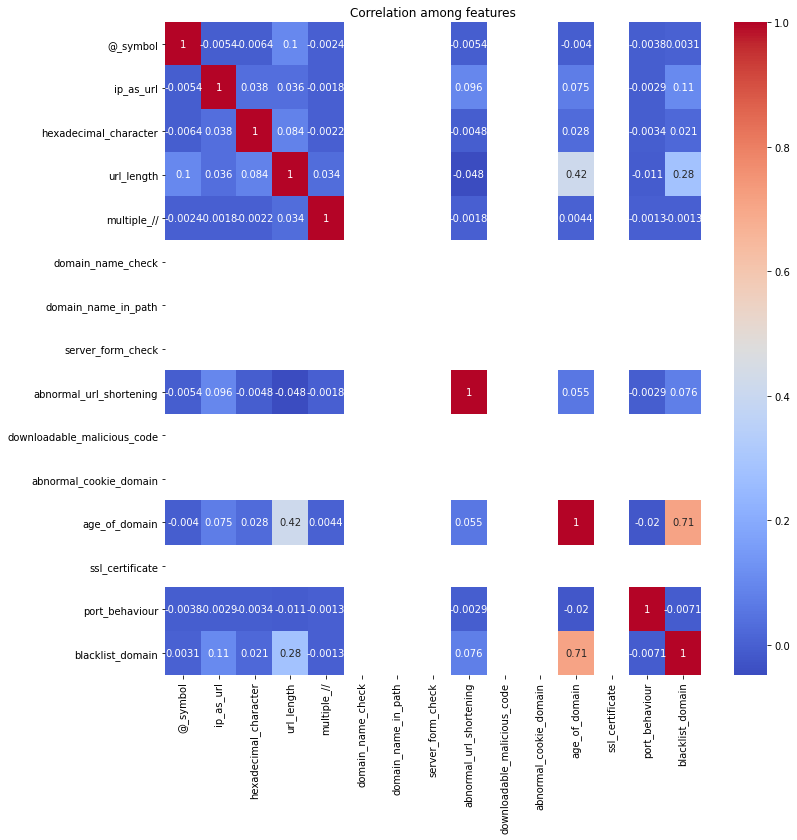

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
seaborn.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Correlation among features')

* Since in above correlation matrix we can see that certain features i.e **'domain_name_check', 'domain_name_in_path', 'server_form_check','downloadable_malicious_code','abnormal_cookie_domain' and 'ssl_certificate'** are having **NaN** values i.e. they are not co-realted to any other features. So we can drop them.
* And we can also see here that ** port behaviour and abnormal url shortning** and negatively correlated to other features i.e. other features are more in phish urls whereas these two features containes in benign url more.

In [ ]:
df=data[['@_symbol','ip_as_url','hexadecimal_character','url_length','multiple_//','abnormal_url_shortening', 'age_of_domain',
       'port_behaviour', 'blacklist_domain']]

In [ ]:
df.head()

,@_symbol,ip_as_url,hexadecimal_character,url_length,multiple_//,abnormal_url_shortening,age_of_domain,port_behaviour,blacklist_domain
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation among features')

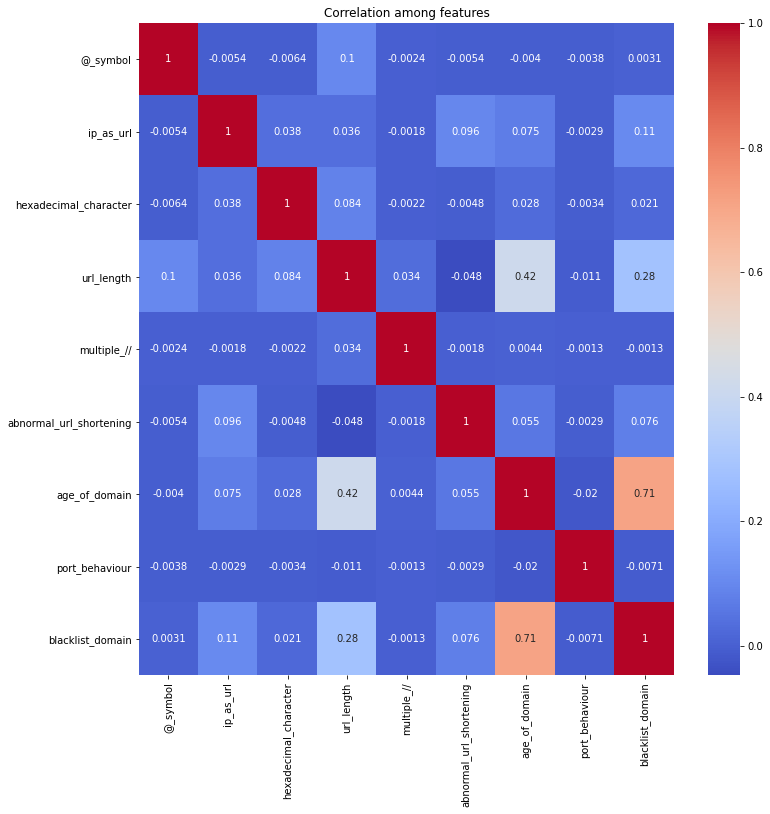

In [ ]:
plt.figure(figsize=(12,12))
seaborn.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Correlation among features')